# **Amulraj Panneerselvam**

### Intern at The SPARKS Foundation
### GRIPFEB21

## Task 1 - Prediction using Supervised ML

### Importing all libraries required 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
print("Libraries imported successfully")

Libraries imported successfully


### Importing the dataset for Supervised ML

In [2]:
url = "http://bit.ly/w-data"
students = pd.read_csv(url)
print ("Data imported successfully")

Data imported successfully


#### Reading first 5 values of the data fetched

In [3]:
students.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Reading Last 5 values of the data fetched

In [4]:
students.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


#### Checking whether the dataset contains any missing values

In [5]:
students.isnull().sum()


Hours     0
Scores    0
dtype: int64

The report shows that there is no missing values in the dataset.

### Exploratory Analysis of the dataset using **Scatter plot**


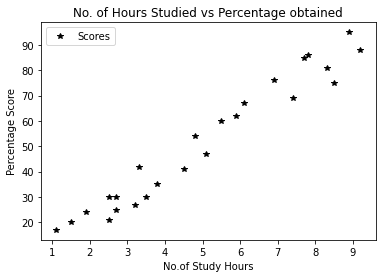

In [6]:
students.plot(x='Hours', y='Scores', style='* k')  
plt.title('No. of Hours Studied vs Percentage obtained')  
plt.xlabel('No.of Study Hours')  
plt.ylabel('Percentage Score')  
plt.show()

###### <font color=brown>*The above resultted graph clearly describes the positive linear correlation between number of hours studied and percentage score* </font>

#### Evaluvating the correlation between these two variable (Hours vs Scores)

In [7]:
students.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Preparing the data for Supervised ML

Extracting the values from the dataset to convert them to attributes and labels which are taged as input and outputs respectively

In [118]:
X = students.iloc[:,:-1].values
Y = students.iloc[:,1].values

In [119]:
print("Input values are")
X

Input values are


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [120]:
print("Output values are")
Y

Output values are


array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Now, the splitted Attributes and Labels are further splitted into Training and Test datasets individually. This is performed by using Scikit-Learn's built-in train_test_split() method: and splitted using 80:20 rule

In [121]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

**Size of the training and test dataset for both input and output are listed**

In [122]:
print("Input_train_data : ", X_train.shape)
print("Input_test_data : ", X_test.shape)
print("Output_train_data : " ,Y_train.shape)
print("Output_test_data : ",Y_test.shape)

Input_train_data :  (20, 1)
Input_test_data :  (5, 1)
Output_train_data :  (20,)
Output_test_data :  (5,)


### Training the model

In [123]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()

In [124]:
linear_reg.fit(X_train,Y_train)
print("Training our algorithm is finished")

Training our algorithm is finished


#### Plotting the trained model with its regression line

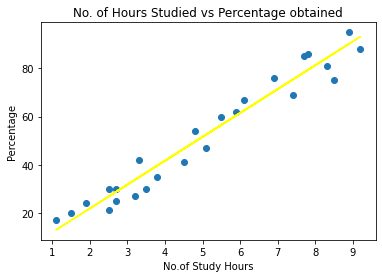

In [125]:
## Plotting the regression line
line = linreg.intercept_ + linreg.coef_ * X_train

## plotting for the train data
plt.scatter(X, Y)
plt.plot(X_train, line, color="yellow")
plt.title("No. of Hours Studied vs Percentage obtained")
plt.xlabel("No.of Study Hours")
plt.ylabel("Percentage")
plt.show()

### **Predicting the output values with the test input values**

In [126]:
Y_pred = linear_reg.predict(X_test)

In [127]:
prediction = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
print("Comparing the actual test value and predicted test value")
prediction

Comparing the actual test value and predicted test value


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Evaluvating the Model

In [128]:
from sklearn import metrics  
Mn_Ab_Err = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', Mn_Ab_Err)
print('R2 Score: ',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.18385989900298
R2 Score:  0.9454906892105355


### What will be predicted score if a student studies for 9.25 hrs/ day?


In [129]:
hours = 9
own_pred = linreg.predict([[hours]])
own_pred

array([91.21406837])

In [130]:
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9
Predicted Score = 91.21406836721482
